mport the ROOT libraries

In [1]:
import ROOT

Welcome to JupyROOT 6.20/04


In [2]:
fInput = ROOT.TFile("DataSet_lowstat.root")
#fInput = ROOT.TFile("DataSet.root")
dataset = fInput.Get("data")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



he observable

In [3]:
mass = ROOT.RooRealVar("mass","#mu^{+}#mu^{-} invariant mass",2.,6.,"GeV")

he Jpsi signal parametrization: we'll use a Crystal Ball

In [4]:
meanJpsi = ROOT.RooRealVar("meanJpsi","The mean of the Jpsi Crystal Ball",3.1,2.8,3.2)
sigmaJpsi = ROOT.RooRealVar("sigmaJpsi","The width of the Jpsi Crystal Ball",0.3,0.0001,1.)
alphaJpsi = ROOT.RooRealVar("alphaJpsi","The alpha of the Jpsi Crystal Ball",1.5,-5.,5.)
nJpsi = ROOT.RooRealVar("nJpsi","The alpha of the Jpsi Crystal Ball",1.5,0.5,5.)

In [5]:
CBJpsi = ROOT.RooCBShape("CBJpsi","The Jpsi Crystall Ball",mass,meanJpsi,sigmaJpsi,alphaJpsi,nJpsi)

he psi(2S) signal parametrization: width will be similar to Jpsi, but with shifted mass

In [6]:
meanpsi2S = ROOT.RooRealVar("meanpsi2S","The mean of the psi(2S) Crystal Ball",3.7,3.65,3.75)
CBpsi2S = ROOT.RooCBShape("CBpsi2S","The psi(2S) Crystal Ball",mass,meanpsi2S,sigmaJpsi,alphaJpsi,nJpsi)

ackground parametrization: just a polynomial

In [7]:
a1 = ROOT.RooRealVar("a1","The a1 of background",-0.7,-2.,2.)
a2 = ROOT.RooRealVar("a2","The a2 of background",0.3,-2.,2.)
a3 = ROOT.RooRealVar("a3","The a3 of background",-0.03,-2.,2.)
backgroundPDF = ROOT.RooChebychev("backgroundPDF","The background PDF",mass,ROOT.RooArgList(a1,a2,a3))

efine the yields

In [8]:
NJpsi = ROOT.RooRealVar("NJpsi","The Jpsi signal events",1500.,0.1,10000.)
Nbkg = ROOT.RooRealVar("Nbkg","The bkg events",5000.,0.1,50000.)

ow define the number of psi(2S) events as a product of crss section*efficiency*luminosity (in pb)<br>
et's assume we measured the trigger, reconstruction and identification efficiency for dimuons and found it to be 95%<br>
owstat sample has 0.64 pb-1<br>
ullstat sample has 37 pb-1

In [9]:
eff_psi = ROOT.RooRealVar("eff_psi","The psi efficiency",0.75,0.00001,1.)
lumi_psi  = ROOT.RooRealVar("lumi_psi","The CMS luminosity",0.64,0.00001,50.,"pb-1")
cross_psi = ROOT.RooRealVar("cross_psi","The psi xsec",3.,0.,40.,"pb")

ow define the number of psi events

In [10]:
Npsi = ROOT.RooFormulaVar("Npsi","@0*@1*@2",ROOT.RooArgList(eff_psi,lumi_psi,cross_psi))

mportant! We cannot fit simultaneously the efficiency, the luminosity and the cross section (our total PDF is only sensitive on the product of the three)<br>
e need to fix two of them, so we'll keep our POI floating<br>
ne can also add an additional PDF to give predictive power on the other two parameters (later)

In [11]:
eff_psi.setConstant(1)
lumi_psi.setConstant(1)

ompose the total PDF

In [12]:
totPDF = ROOT.RooAddPdf("totPDF","The total PDF",ROOT.RooArgList(CBJpsi,CBpsi2S,backgroundPDF),ROOT.RooArgList(NJpsi,Npsi,Nbkg))

o the actual fit

In [13]:
totPDF.fitTo(dataset, ROOT.RooFit.Extended(1))

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (CBJpsi,CBpsi2S,backgroundPDF)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 NJpsi        1.50000e+03  7.49950e+02    1.00000e-01  1.00000e+04
     2 Nbkg         5.00000e+03  2.49995e+03    1.00000e-01  5.00000e+04
     3 a1          -7.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     4 a2           3.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     5 a3          -3.00000e-02  4.00000e-01   -2.00000e+00  2.00000e+00
     6 alphaJpsi    1.50000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     7 cross_psi    3.00000e+00  1.50000e+00    0.00000e+00  4.00000e+01
     8 meanJpsi     3.10000e+00  4.00000e-02    2.80000e+00  3.20000e+00
     9 meanpsi2S    3.700

rint values of the parameters (that now reflect fitted values and errors)

In [14]:
print ("##############")
meanpsi2S.Print()
NJpsi.Print()
Npsi.Print()
print ("##############")

##############
##############
RooRealVar::meanpsi2S = 3.69287 +/- 0.0246293  L(3.65 - 3.75) 
RooRealVar::NJpsi = 157.496 +/- 19.9871  L(0.1 - 10000) 
RooFormulaVar::Npsi[ actualVars=(eff_psi,lumi_psi,cross_psi) formula="x[0]*x[1]*x[2]" ] = 5.72535


ow plot the data and the fit result

In [15]:
xframe = mass.frame()
dataset.plotOn(xframe)
totPDF.plotOn(xframe)

<ROOT.RooPlot object ("frame_mass_7fedd83b92b0") at 0x7fedd83b92b0>

ne can also plot the single components of the total PDF, like the background component

In [16]:
totPDF.plotOn(xframe, ROOT.RooFit.Components("backgroundPDF"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_mass_7fedd83b92b0") at 0x7fedd83b92b0>

[#1] INFO:Plotting -- RooAbsPdf::plotOn(totPDF) directly selected PDF components: (backgroundPDF)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totPDF) indirectly selected PDF components: ()


raw the results

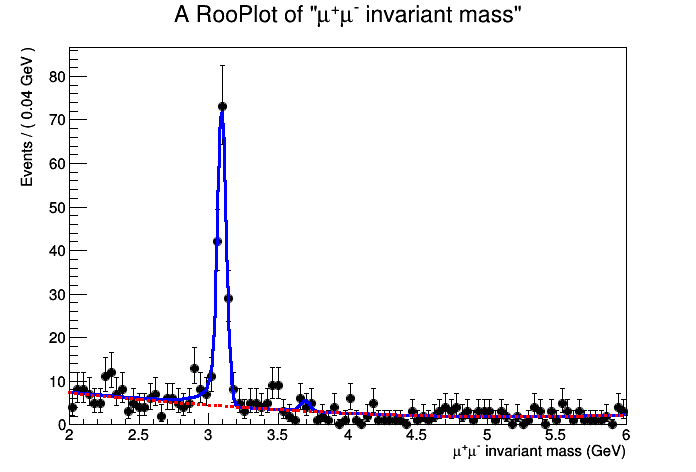

In [17]:
c1 = ROOT.TCanvas()
xframe.Draw()
#c1.SaveAs("exercise_0.png")
c1.Draw()

ow save the data and the PDF into a Workspace, for later use for statistical analysis

In [ ]:
ws = ROOT.RooWorkspace("ws")
getattr(ws,'import')(dataset)
getattr(ws,'import')(totPDF)

In [ ]:
fOutput = ROOT.TFile("Workspace_mumufit.root","RECREATE")
ws.Write()
fOutput.Write()
fOutput.Close()